# Plotting births by day of the week for 3 decades

__Boxes of code starting with a # are there for comprehension of the actions made, both reasons and consequences__

In [1]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

url = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"
data = pd.read_csv(url)

In [2]:
# We need only years from 1960 to 1989
data = data[data["year"] < 1990]
data = data[data["year"] > 1959]

In [3]:
data.dropna(inplace = True)

In [4]:
#data["day"].unique()

In [5]:
# Removing impossible dates such as day 99 of a month
data = data[data["day"] <= 31]

In [6]:
#data["day"].unique()

In [7]:
#print(pd.cut(data["births"], [0, 100, 1000, 10000]).unique())
#print("\n", len(data[data["births"] < 200]), len(data[data["births"] < 2000]))

In [8]:
# Removing all other absurd dates such as 30 of february or 31 of april, 
# wich have a significantly lower number of birth
data = data[data["births"] > data["births"].mean()/10]

In [9]:
#print(len(data[data["births"] < 2000]))

In [10]:
#data.head()

In [11]:
# Transforming the 3 columns "year", "month", "day" into a single "date" one 
data["date"] = pd.to_datetime(data.loc[:, :"day"])
# We keep the year data for future grouping
data.drop(["month", "day"], axis = 1, inplace = True)
group = data.groupby(["date", "year"]).sum()
group["week_day"] = 0.

In [12]:
#group.head()

In [13]:
for day, year in group.index:
    group.loc[day, "week_day"] = day.weekday()

In [14]:
#group.head()

In [15]:
final = group.groupby(["year", "week_day"]).sum()

In [16]:
#final.head(10)

In [17]:
# Automatically create explicit variable name in a loop using a dictionary
decades = {}
for decade in range(1960,1981,10):
        decades[f"years_{decade}"] = final.loc[decade:decade+9].groupby("week_day").sum()

In [18]:
#decades["years_1980"]

In [19]:
week_days = [calendar.day_name[day] for day in decades["years_1960"].index.values.astype(int)]

__Graph is saved in a .png file__

Please notice that for the 1960 decade, only the data of 1969 were available, hence the following graph.


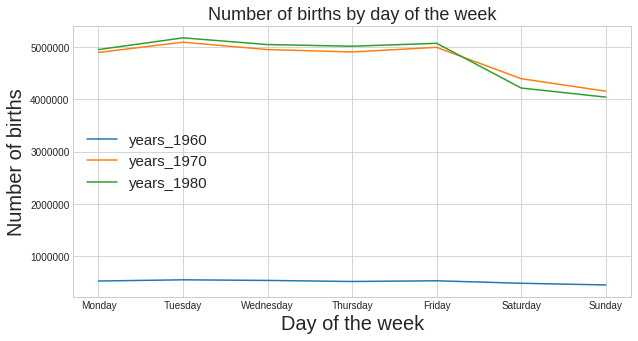

In [20]:
plt.figure(figsize=(10, 5))
for decade in decades.keys():
    plt.plot(week_days, decades[decade].values, label = decade)
plt.rcParams.update({'font.size': 15})
plt.title("Number of births by day of the week")
plt.legend(loc='center left')
plt.xlabel("Day of the week", fontsize = 20)
plt.ylabel("Number of births", fontsize = 20)
plt.savefig("births-by-day.png")
print("Please notice that for the 1960 decade, only the data of 1969 were available, hence the following graph.")